### **Este archivo consta de un análisis exploratorio de datos proporcionados por el "US Census Bureau" como censo demográfico.** 

**Descripción General**

En este análisis exploratorio, se agruparon y analizaron los datos del censo para entender mejor la distribución demográfica y socioeconómica en los Estados Unidos. Se realizaron los siguientes pasos principales:

1. **Agrupación y Transformación**: 
   - Los datos del censo se agruparon por estado y condado, calculando las sumas y promedios de varias columnas numéricas clave.
   - Se crearon nuevas columnas, como la población hispana por condado.

2. **Visualización de Datos**:
   - Se utilizaron varios gráficos para visualizar y analizar diferentes aspectos de la distribución y composición demográfica.
   - Los gráficos abordaron temas como la distribución del porcentaje de hispanos por estado, la cantidad de hispanos por estado, la composición racial promedio por estado y la relación entre el porcentaje de hispanos y el ingreso promedio.

3. **Preparación de Datos**: 
   - Se obtuvieron resúmenes de la estructura y las primeras filas del dataset utilizando `info()` y `head(2)`.
   - Se eliminaron las columnas irrelevantes para el análisis específico (`men_population`, `women_population`, `Hispanic`, `White`, `Black`, `Native`, `Asian`, `Pacific`, `avg_poverty_rate`, `Employed`, `Unemployment`).
   - Se renombraron y reordenaron las columnas para mayor claridad.

Este enfoque proporciona una comprensión más profunda de la diversidad étnica y las disparidades económicas en diferentes regiones de los Estados Unidos, lo cual es esencial para desarrollar políticas inclusivas y equitativas.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Carga del dataset
censo = pd.read_csv('./Datasets/censo_demografico_usa.csv')

In [3]:
# Previsualizacion del dataset
censo.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [4]:
# Informacion del tipo de columna del dataframe
censo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           74001 non-null  int64  
 1   State             74001 non-null  object 
 2   County            74001 non-null  object 
 3   TotalPop          74001 non-null  int64  
 4   Men               74001 non-null  int64  
 5   Women             74001 non-null  int64  
 6   Hispanic          73305 non-null  float64
 7   White             73305 non-null  float64
 8   Black             73305 non-null  float64
 9   Native            73305 non-null  float64
 10  Asian             73305 non-null  float64
 11  Pacific           73305 non-null  float64
 12  VotingAgeCitizen  74001 non-null  int64  
 13  Income            72885 non-null  float64
 14  IncomeErr         72885 non-null  float64
 15  IncomePerCap      73256 non-null  float64
 16  IncomePerCapErr   73256 non-null  float6

In [5]:
# Revision de valores nulos
valores_nulos = censo.isnull().sum()
valores_nulos

TractId                0
State                  0
County                 0
TotalPop               0
Men                    0
Women                  0
Hispanic             696
White                696
Black                696
Native               696
Asian                696
Pacific              696
VotingAgeCitizen       0
Income              1116
IncomeErr           1116
IncomePerCap         745
IncomePerCapErr      745
Poverty              842
ChildPoverty        1110
Professional         811
Service              811
Office               811
Construction         811
Production           811
Drive                801
Carpool              801
Transit              801
Walk                 801
OtherTransp          801
WorkAtHome           801
MeanCommute          946
Employed               0
PrivateWork          811
PublicWork           811
SelfEmployed         811
FamilyWork           811
Unemployment         810
dtype: int64

###### Al visualizar la data se determina que dichos valores nulos no representan un sesgo o perdida de data, debido a que dichos nulos se deben a un error de formato en el archivo original

In [6]:
# Eliminacion de valores nulos
censo = censo.dropna()

valores_nulos = censo.isnull().sum()
valores_nulos

TractId             0
State               0
County              0
TotalPop            0
Men                 0
Women               0
Hispanic            0
White               0
Black               0
Native              0
Asian               0
Pacific             0
VotingAgeCitizen    0
Income              0
IncomeErr           0
IncomePerCap        0
IncomePerCapErr     0
Poverty             0
ChildPoverty        0
Professional        0
Service             0
Office              0
Construction        0
Production          0
Drive               0
Carpool             0
Transit             0
Walk                0
OtherTransp         0
WorkAtHome          0
MeanCommute         0
Employed            0
PrivateWork         0
PublicWork          0
SelfEmployed        0
FamilyWork          0
Unemployment        0
dtype: int64

### Agrupacion de la data por estado

##### En esta fase del análisis exploratorio de datos, se agruparon los datos del censo por estado y condado, calculando las sumas y promedios de varias columnas numéricas clave. Se renombraron las columnas para mayor claridad y se creó una nueva columna que calcula la población hispana por condado. Estas transformaciones permiten una mejor comprensión de la distribución demográfica y socioeconómica a nivel de estado y condado, facilitando análisis más detallados y específicos en pasos posteriores del análisis.


In [7]:
# Agrupar por estado y condado, calculando el resto de columnas numericas por sumas y promedios
censo_agrupado = censo.groupby(['State', 'County']).agg({
    'TotalPop': 'sum',
    'Men': 'sum',
    'Women': 'sum',
    'Hispanic': 'mean',
    'White': 'mean',
    'Black': 'mean',
    'Native': 'mean',
    'Asian': 'mean',
    'Pacific': 'mean',
    'Income': 'mean',
    'IncomePerCap': 'mean',
    'Poverty': 'mean',
    'Employed': 'sum', 
    'Unemployment': 'mean',
}).reset_index()

# Renombrar columnas para claridad
censo_agrupado.rename(columns={
    'Men': 'men_population',
    'Women': 'women_population',
    'TotalPop': 'total_population',
    'Income': 'avg_income',
    'IncomePerCap': 'avg_income_per_capita',
    'Poverty': 'avg_poverty_rate'
}, inplace=True)

In [8]:
censo_agrupado.head()

,State,County,total_population,men_population,women_population,Hispanic,White,Black,Native,Asian,Pacific,avg_income,avg_income_per_capita,avg_poverty_rate,Employed,Unemployment
0,Alabama,Autauga County,55036,26899,28137,3.091667,72.325000,21.608333,0.400000,0.625000,0.033333,53567.500000,26588.166667,14.558333,24112,5.975000
1,Alabama,Baldwin County,203360,99527,103833,4.012903,83.245161,10.019355,0.887097,0.541935,0.000000,52732.225806,29130.709677,12.874194,89527,6.219355
2,Alabama,Barbour County,26201,13976,12225,4.055556,46.022222,47.855556,0.144444,0.488889,0.000000,32717.777778,17891.666667,27.755556,8878,11.866667
3,Alabama,Bibb County,22580,12251,10329,2.225000,79.400000,17.550000,0.375000,0.000000,0.000000,44677.000000,21799.000000,13.925000,8171,8.775000
4,Alabama,Blount County,57667,28490,29177,9.866667,86.644444,1.333333,0.355556,0.133333,0.000000,46325.555556,21598.444444,16.422222,21380,4.766667


In [9]:
# Creacion de una nueva columna con el calculo de la poblacion de hispanos por condado
censo_agrupado['hispanic_population'] = censo_agrupado['total_population'] * censo_agrupado['Hispanic'] / 100

In [10]:
censo_agrupado.head()

,State,County,total_population,men_population,women_population,Hispanic,White,Black,Native,Asian,Pacific,avg_income,avg_income_per_capita,avg_poverty_rate,Employed,Unemployment,hispanic_population
0,Alabama,Autauga County,55036,26899,28137,3.091667,72.325000,21.608333,0.400000,0.625000,0.033333,53567.500000,26588.166667,14.558333,24112,5.975000,1701.529667
1,Alabama,Baldwin County,203360,99527,103833,4.012903,83.245161,10.019355,0.887097,0.541935,0.000000,52732.225806,29130.709677,12.874194,89527,6.219355,8160.640000
2,Alabama,Barbour County,26201,13976,12225,4.055556,46.022222,47.855556,0.144444,0.488889,0.000000,32717.777778,17891.666667,27.755556,8878,11.866667,1062.596111
3,Alabama,Bibb County,22580,12251,10329,2.225000,79.400000,17.550000,0.375000,0.000000,0.000000,44677.000000,21799.000000,13.925000,8171,8.775000,502.405000
4,Alabama,Blount County,57667,28490,29177,9.866667,86.644444,1.333333,0.355556,0.133333,0.000000,46325.555556,21598.444444,16.422222,21380,4.766667,5689.810667


### Graficos

##### En esta fase del análisis exploratorio, se utilizaron varios gráficos para visualizar y analizar diferentes aspectos de la distribución y composición demográfica de la población hispana en los Estados Unidos. Los gráficos abordaron temas como la distribución del porcentaje de hispanos por estado, la cantidad de hispanos por estado, la composición racial promedio por estado y la relación entre el porcentaje de hispanos y el ingreso promedio. Estas visualizaciones proporcionaron una comprensión más profunda de la diversidad étnica y las disparidades económicas entre distintas regiones, lo cual es esencial para desarrollar políticas inclusivas y equitativas.


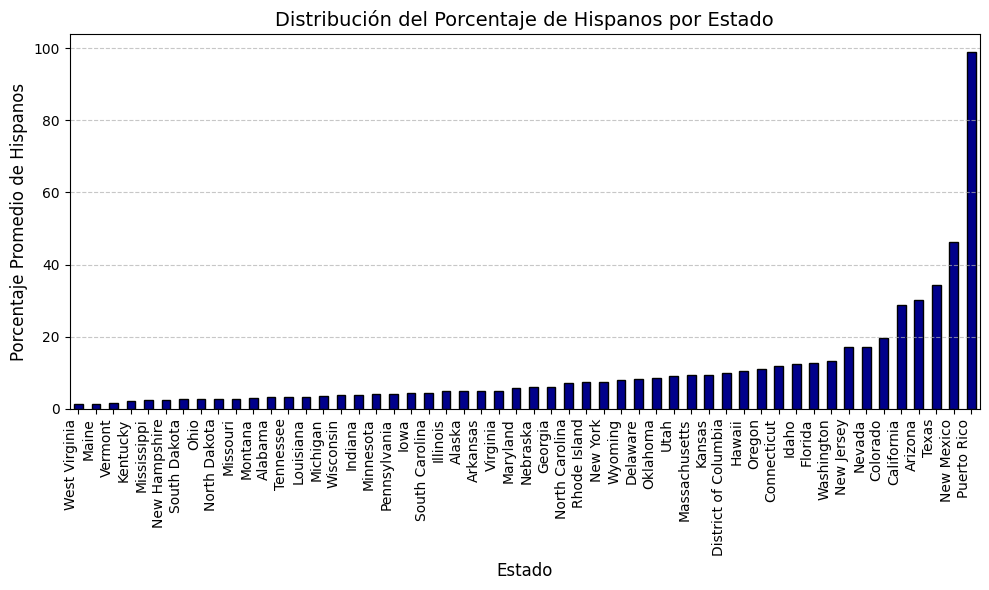

In [11]:
# Agrupar por estado y calcular el porcentaje promedio de población hispana
state_hispanic_avg = censo_agrupado.groupby('State')['Hispanic'].mean().sort_values()

# Crear un gráfico de barras para la distribución de hispanos por estado
plt.figure(figsize=(10, 6))
state_hispanic_avg.plot(kind='bar', color='darkblue', edgecolor='black')

plt.title('Distribución del Porcentaje de Hispanos por Estado', fontsize=14)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Porcentaje Promedio de Hispanos', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


###### El gráfico revela una significativa variabilidad en la distribución del porcentaje de hispanos entre los estados. Puerto Rico destaca con un porcentaje superior al 90%, seguido por Nuevo México, California y Texas, que también tienen porcentajes considerablemente altos. Por otro lado, estados como West Virginia, Maine y Vermont tienen porcentajes muy bajos de población hispana. Esta variabilidad es crucial para entender la demografía hispana en los Estados Unidos y puede influir en políticas públicas, servicios comunitarios y estrategias de mercado dirigidas a esta población.

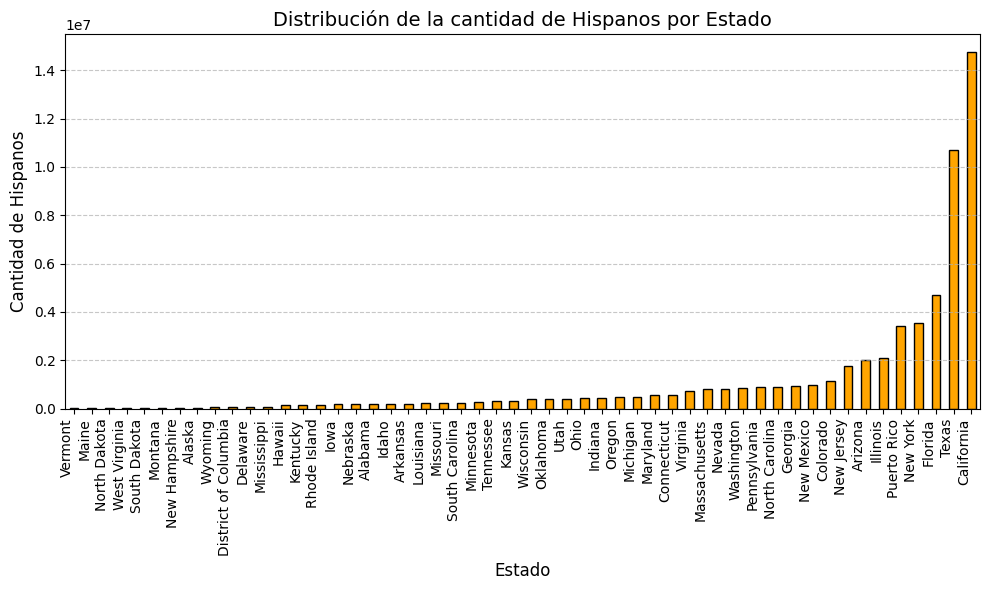

In [12]:
# Agrupar por estado y calcular el porcentaje promedio de población hispana
state_hispanic_avg = censo_agrupado.groupby('State')['hispanic_population'].sum().sort_values()

# Crear un gráfico de barras para la distribución de hispanos por estado
plt.figure(figsize=(10, 6))
state_hispanic_avg.plot(kind='bar', color='orange', edgecolor='black')

plt.title('Distribución de la cantidad de Hispanos por Estado', fontsize=14)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Cantidad de Hispanos', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

###### El gráfico pone de manifiesto la concentración significativa de la población hispana en ciertos estados. California lidera con la mayor cantidad de hispanos, seguido de Texas y Florida. Esta distribución sugiere que estos estados son focos importantes de la comunidad hispana, lo cual puede tener implicaciones en términos de políticas públicas, servicios comunitarios y mercados. Por otro lado, otros estados muestran cantidades mucho menores de población hispana, reflejando una distribución desigual que puede influir en las dinámicas socioeconómicas y culturales en diferentes regiones del país.


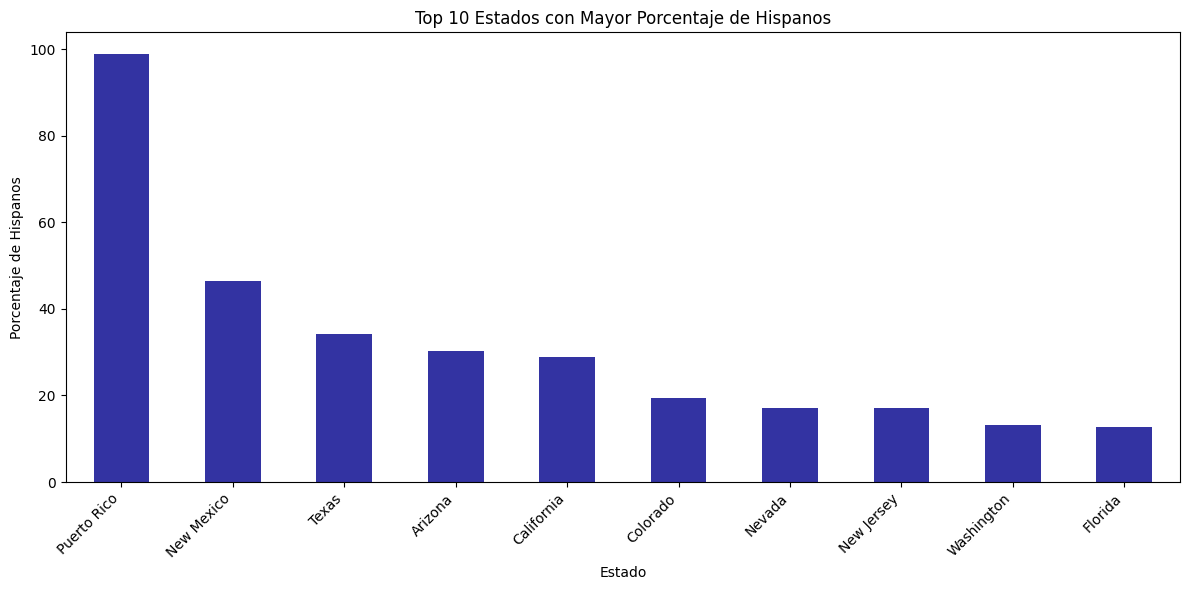

In [13]:
top_hispanic_states = censo_agrupado.groupby('State')['Hispanic'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_hispanic_states.plot(kind='bar', color='darkblue', alpha=0.8)
plt.title('Top 10 Estados con Mayor Porcentaje de Hispanos')
plt.xlabel('Estado')
plt.ylabel('Porcentaje de Hispanos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


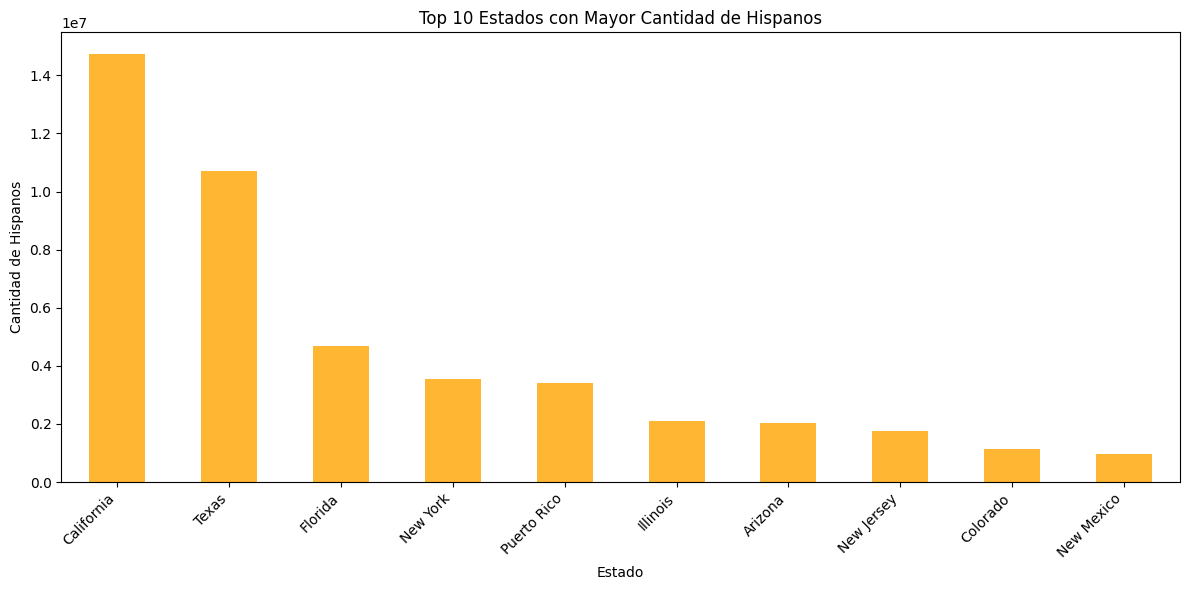

In [13]:
top_hispanic_states = censo_agrupado.groupby('State')['hispanic_population'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_hispanic_states.plot(kind='bar', color='orange', alpha=0.8)
plt.title('Top 10 Estados con Mayor Cantidad de Hispanos')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Hispanos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

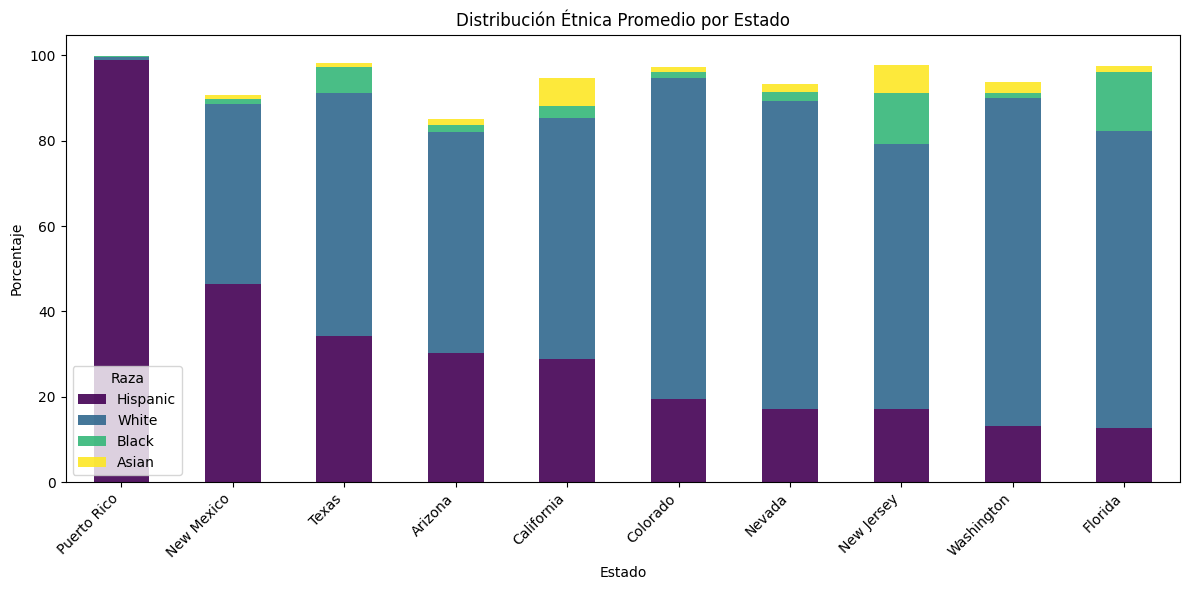

In [14]:
race_distribution = censo_agrupado.groupby('State')[['Hispanic', 'White', 'Black', 'Asian']].mean().sort_values(ascending=False, by='Hispanic').head(10)    

race_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis', alpha=0.9)
plt.title('Distribución Étnica Promedio por Estado')
plt.xlabel('Estado')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Raza')
plt.tight_layout()
plt.show()


###### El gráfico evidencia la diversidad étnica en varios estados de los Estados Unidos y en Puerto Rico. Puerto Rico presenta una predominancia notable de la población hispana, mientras que estados como New Jersey y Washington muestran una mayor diversidad, con una distribución más equilibrada entre los diferentes grupos étnicos. Esta visualización subraya las diferencias demográficas y la multiculturalidad presente en distintas regiones, lo cual es crucial para diseñar políticas inclusivas y entender mejor las dinámicas sociales de cada estado.


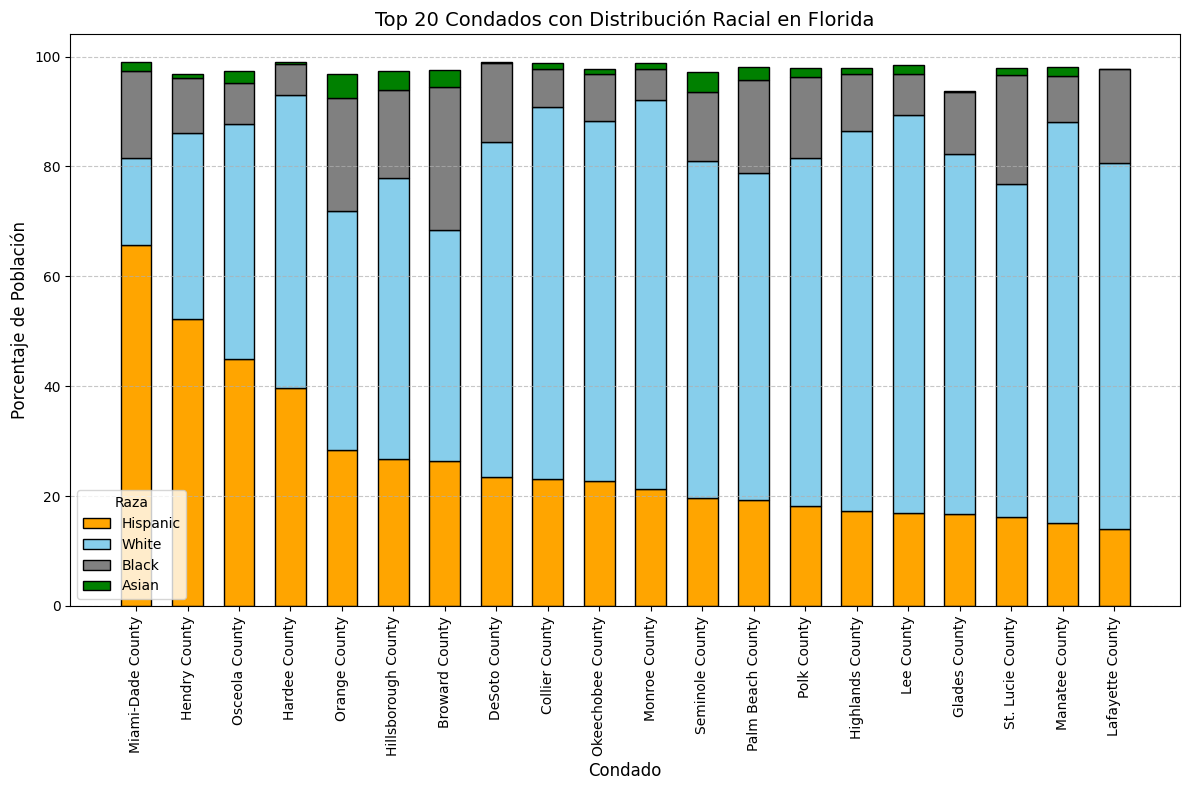

In [15]:
# Filtrar por el estado específico (por ejemplo, "Alabama")
estado = "Florida"
estado_df = censo_agrupado[censo_agrupado['State'] == estado]

# Seleccionar el Top 5 de condados con mayor porcentaje de hispanos
top_5_hispanic = estado_df.nlargest(20, 'Hispanic')

# Crear un gráfico de barras apiladas para mostrar la distribución racial
plt.figure(figsize=(12, 8))
bar_width = 0.6  # Ancho de las barras

# Crear las barras para cada raza
plt.bar(top_5_hispanic['County'], top_5_hispanic['Hispanic'], label='Hispanic', color='orange', edgecolor='black', width=bar_width)
plt.bar(top_5_hispanic['County'], top_5_hispanic['White'], bottom=top_5_hispanic['Hispanic'], label='White', color='skyblue', edgecolor='black', width=bar_width)
plt.bar(top_5_hispanic['County'], top_5_hispanic['Black'], bottom=top_5_hispanic['Hispanic'] + top_5_hispanic['White'], label='Black', color='gray', edgecolor='black', width=bar_width)
plt.bar(top_5_hispanic['County'], top_5_hispanic['Asian'], bottom=top_5_hispanic['Hispanic'] + top_5_hispanic['White'] + top_5_hispanic['Black'], label='Asian', color='green', edgecolor='black', width=bar_width)

# Agregar títulos y etiquetas
plt.title(f'Top 20 Condados con Distribución Racial en {estado}', fontsize=14)
plt.xlabel('Condado', fontsize=12)
plt.ylabel('Porcentaje de Población', fontsize=12)
plt.xticks(rotation=90, fontsize=10, ha='center')
plt.legend(title='Raza', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()



###### El gráfico proporciona una visión clara de la diversidad racial en los principales condados de Florida. Los datos muestran que, aunque algunos condados tienen una predominancia clara de una raza, como los hispanos en Miami-Dade, la mayoría presenta una mezcla diversa de diferentes grupos raciales. Esta diversidad puede influir significativamente en las políticas locales, la prestación de servicios y las dinámicas comunitarias. Además, resalta la importancia de considerar la composición racial al desarrollar estrategias de inclusión y equidad en el estado.


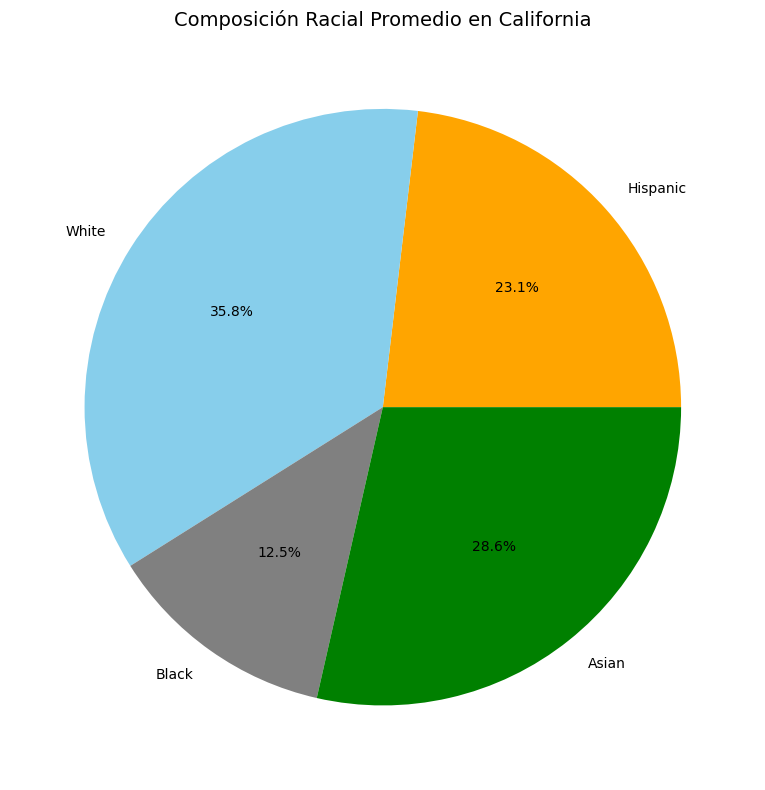

In [16]:
diversity_data = censo_agrupado[censo_agrupado['State'] == 'California'].iloc[0]  # Cambiar por el estado deseado
diversity_data = diversity_data[['Hispanic', 'White', 'Black', 'Asian']]

plt.figure(figsize=(8, 8))
diversity_data.plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'skyblue', 'gray', 'green'])
plt.title('Composición Racial Promedio en California', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()



###### El gráfico ilustra la diversidad racial en California, destacando que no hay un grupo racial predominante absoluto, lo cual refleja la multiculturalidad del estado. Los blancos constituyen el grupo mayoritario, seguidos de cerca por los asiáticos e hispanos. Esta composición racial variada subraya la necesidad de políticas y programas inclusivos que aborden las necesidades de estas diversas comunidades. Además, la notable presencia de varias etnias puede influir en las dinámicas sociales, económicas y culturales del estado.


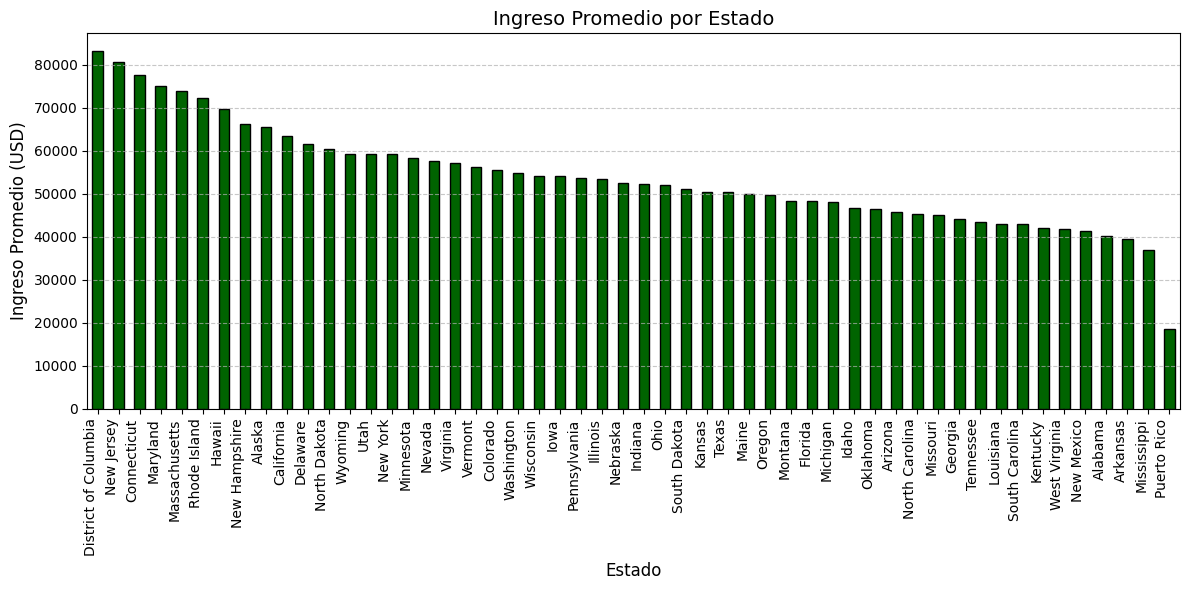

In [17]:
# Agrupar los datos por estado y calcular el ingreso promedio
state_avg_income = censo_agrupado.groupby('State')['avg_income'].mean().sort_values(ascending=False)

# Crear un gráfico de barras para el ingreso promedio por estado
plt.figure(figsize=(12, 6))
state_avg_income.plot(kind='bar', color='darkgreen', edgecolor='black')

# Configurar el gráfico
plt.title('Ingreso Promedio por Estado', fontsize=14)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Ingreso Promedio (USD)', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

###### El gráfico revela disparidades económicas significativas entre los estados y territorios de los Estados Unidos. El Distrito de Columbia muestra el ingreso promedio más alto, lo cual puede estar influenciado por la concentración de empleos gubernamentales y de alto perfil en la capital del país. Por otro lado, Puerto Rico tiene el ingreso promedio más bajo, destacando posibles desafíos económicos en el territorio. Estos datos son cruciales para entender las diferencias económicas regionales y pueden ser utilizados para desarrollar políticas que aborden estas desigualdades y promuevan un crecimiento económico más equitativo.


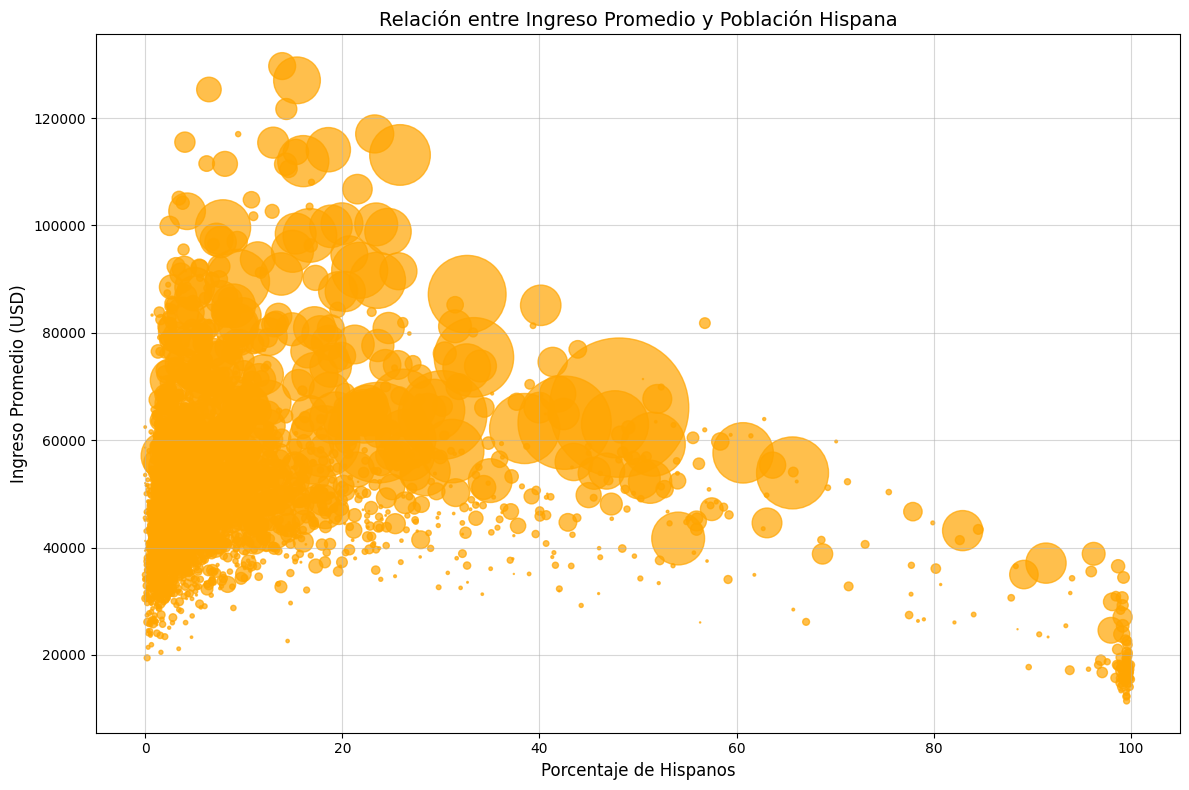

In [18]:
plt.figure(figsize=(12, 8))
plt.scatter(censo_agrupado['Hispanic'], censo_agrupado['avg_income'], s=censo_agrupado['total_population'] / 1000, alpha=0.7, color='orange')
plt.title('Relación entre Ingreso Promedio y Población Hispana', fontsize=14)
plt.xlabel('Porcentaje de Hispanos', fontsize=12)
plt.ylabel('Ingreso Promedio (USD)', fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


###### El gráfico revela una tendencia inversa entre el porcentaje de hispanos y el ingreso promedio. En general, las áreas con mayor porcentaje de población hispana presentan ingresos promedio más bajos. Esta correlación puede reflejar diversas dinámicas socioeconómicas y destaca la necesidad de políticas que aborden la desigualdad económica y apoyen a las comunidades hispanas. Es crucial investigar más a fondo las causas subyacentes de esta tendencia para diseñar intervenciones efectivas y promover la equidad económica.

### Proceso de carga

##### En esta fase del análisis exploratorio de datos, se realizaron varios pasos para limpiar y reorganizar el conjunto de datos `censo_agrupado`. Primero, se obtuvo un resumen de la estructura y las primeras filas del dataset utilizando `info()` y `head(2)`. Posteriormente, se eliminaron las columnas irrelevantes para el análisis específico (`men_population`, `women_population`, `Hispanic`, `White`, `Black`, `Native`, `Asian`, `Pacific`, `avg_poverty_rate`, `Employed`, `Unemployment`). Las columnas restantes fueron renombradas para mayor claridad y reordenadas para facilitar el análisis. Finalmente, el dataset limpiado se exportó a un archivo CSV denominado `censo.csv` para su uso posterior.


In [20]:
censo_agrupado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3219 entries, 0 to 3218
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   State                  3219 non-null   object 
 1   County                 3219 non-null   object 
 2   total_population       3219 non-null   int64  
 3   men_population         3219 non-null   int64  
 4   women_population       3219 non-null   int64  
 5   Hispanic               3219 non-null   float64
 6   White                  3219 non-null   float64
 7   Black                  3219 non-null   float64
 8   Native                 3219 non-null   float64
 9   Asian                  3219 non-null   float64
 10  Pacific                3219 non-null   float64
 11  avg_income             3219 non-null   float64
 12  avg_income_per_capita  3219 non-null   float64
 13  avg_poverty_rate       3219 non-null   float64
 14  Employed               3219 non-null   int64  
 15  Unem

In [21]:
censo_agrupado.head(2)

,State,County,total_population,men_population,women_population,Hispanic,White,Black,Native,Asian,Pacific,avg_income,avg_income_per_capita,avg_poverty_rate,Employed,Unemployment,hispanic_population
0,Alabama,Autauga County,55036,26899,28137,3.091667,72.325000,21.608333,0.400000,0.625000,0.033333,53567.500000,26588.166667,14.558333,24112,5.975000,1701.529667
1,Alabama,Baldwin County,203360,99527,103833,4.012903,83.245161,10.019355,0.887097,0.541935,0.000000,52732.225806,29130.709677,12.874194,89527,6.219355,8160.640000


In [ ]:
# Eliminacion de columnas innecesarias
censo_agrupado.drop(columns=['men_population', 'women_population', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'avg_poverty_rate', 'Employed', 'Unemployment'], inplace = True)

In [23]:
censo_agrupado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3219 entries, 0 to 3218
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   State                  3219 non-null   object 
 1   County                 3219 non-null   object 
 2   total_population       3219 non-null   int64  
 3   avg_income             3219 non-null   float64
 4   avg_income_per_capita  3219 non-null   float64
 5   hispanic_population    3219 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 151.0+ KB


In [24]:
censo_agrupado.drop(columns=['avg_income_per_capita'], inplace= True)

In [25]:
censo_agrupado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3219 entries, 0 to 3218
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State                3219 non-null   object 
 1   County               3219 non-null   object 
 2   total_population     3219 non-null   int64  
 3   avg_income           3219 non-null   float64
 4   hispanic_population  3219 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 125.9+ KB


In [ ]:
# Renombre de columnas
censo_agrupado = censo_agrupado.rename(columns={'State': 'state_name', 'County':'county_name'})

In [ ]:
# Asignacion de nuevo orden de columnas
nuevo_orden = ['state_name', 'county_name', 'total_population', 'hispanic_population', 'avg_income']
censo_agrupado = censo_agrupado.reindex(columns=nuevo_orden)

In [28]:
censo_agrupado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3219 entries, 0 to 3218
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state_name           3219 non-null   object 
 1   county_name          3219 non-null   object 
 2   total_population     3219 non-null   int64  
 3   hispanic_population  3219 non-null   float64
 4   avg_income           3219 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 125.9+ KB


In [ ]:
# Exportacion del dataframe en formato .csv
censo_agrupado.to_csv('./Datasets_limpios/censo.csv', index=False)